# Udacity Data Analyst Nanodegree
# Project: Investigate a Dataset 

## Relationship between fertility rate and three variables: children under 5yo mortality,  primary education, and income (GDP).

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<ul>
    <li><a href="#2010">Selecting 2010 columns</a></li>
    <li><a href="#renamingcols">Renaming columns</a></li>
    <li><a href="#fixdt">Fixing data types</a></li>
    <li><a href="#duplicated">Duplicated Data</a></li>
    <li><a href="#missingv">Missing values</a></li>
    
</ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
        <li><a href="#fert_dist">Fertility Distribution</a></li>
    <li><a href="#q1">Fertility vs Child mortality</a></li>
    <li><a href="#q2">Fertility vs Primary education</a></li>
    <li><a href="#q4">Fertility vs Income per person</a></li>
</ul>
<li><a href="#conclusions"> Limitations and conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is thought in a brief investigation on the variables around the fertility that could affect other surroundings, since motherhood is an event that changes all of the family dynamics. All data was taken from 
the <a href="https://www.gapminder.org/data/">Gapminder List of Indicators</a>.

<P>
The variables that were chosen to take into the analysis were the next:

> 1. Children per woman 
> 2. Child mortality (0-5 year-olds dying per 1,000 born)
> 3. Primary Completition rate total
> 4. Primary Completition rate female
> 5. Income per person (GDP/capita, PPP inflation-adjusted)
>

The questions which arose with these indicators, are such as:

> Do countries with higher fertility rates also have higher child mortality?
> 
> Is the fertility related with the primary education completion?
> 
> In poorer countries, do people tend to have a lot or few children?

The next files were downloaded and renamed and saved as csv format

> "indicator undata total_fertility.xlsx"  saved as   "total_fertility.csv"
>
> "indicator gapminder under5mortality.xlsx"  saved as   "under5mortality.csv"
>
> "Primary Completition rate total.xlsx"  saved as  "primary_completition_total.csv"
>
> "primary_completition_rate_female.xlsx"  saved as   "primary_completition_female.csv"
>
> "indicator gapminder gdp_per_capita_ppp.xlsx"  saved as    "gdp_per_capita_ppp.csv"
>


The year **2010** was the reference, since it is the most recent year where all files converge with available data.

In [2]:
# Set up import statements for all packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### Importing dataframes

In [3]:
# Import all the variables
#Children per woman (total fertility)
child_per_woman = pd.read_csv('total_fertility.csv')

#Child mortality (0-5 year-olds dying per 1,000 born)
child_mortality = pd.read_csv('under5mortality.csv')

#Primary Completition rate total
primary_total = pd.read_csv('primary_completition_total.csv')

#Primary Completition rate female
primary_female = pd.read_csv('primary_completition_female.csv')

#Income per person (GDP/capita, PPP inflation-adjusted)
gdp = pd.read_csv('gdp_per_capita_ppp.csv')


<a id='2010'></a>
#### Selecting 2010 columns in child_per_woman
Since we are interested only on the 2010 registers, we'll select only the country and the 2010 data columns, for each of the datasets created

In [4]:
# Show the columns of the child_per_woman dataframe
child_per_woman.columns

Index(['Total fertility rate', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [5]:
# Select only the countries and the data in 2010
child_per_woman = child_per_woman.iloc[ : , np.r_[0,211] ]
child_per_woman.head()

,Total fertility rate,2010
0,Abkhazia,NaN
1,Afghanistan,5.66
2,Akrotiri and Dhekelia,NaN
3,Albania,1.74
4,Algeria,2.82


#### Selecting 2010 columns in child_mortality 

In [6]:
# Show the columns of the child_mortality dataframe
child_mortality.columns

Index(['Under five mortality', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [7]:
# Select only the countries and the data in 2010
child_mortality = child_mortality.iloc[ : , np.r_[0,211] ]
child_mortality.head()

,Under five mortality,2010
0,Abkhazia,NaN
1,Afghanistan,105.0
2,Akrotiri and Dhekelia,NaN
3,Albania,16.6
4,Algeria,27.4


#### Selecting 2010 columns in primary_total and primary_female

In [8]:
# Show the columns of the primary_total dataframe
primary_total.head(1)

,"Primary completion rate, total (% of relevant age group)",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Select only the countries and the data in 2010
primary_total = primary_total.iloc[ : , np.r_[0,41] ]
primary_total.head()

,"Primary completion rate, total (% of relevant age group)",2010
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN
3,Albania,86.26271
4,Algeria,95.98508


In [10]:
# Show the columns of the primary_female dataframe
primary_female.head(1)

,Primary school completion (% of girls),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Select only the countries and the data in 2010
primary_female = primary_female.iloc[ : , np.r_[0,41] ]
primary_female.head()

,Primary school completion (% of girls),2010
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN
3,Albania,86.01452
4,Algeria,95.87439


#### Selecting 2010 columns in gdp

In [12]:
# Show the columns of the gdp dataframe
gdp.columns

Index(['GDP per capita', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [13]:
# Select only the countries and the data in 2010
gdp = gdp.iloc[ : , np.r_[0,211] ]
gdp.head()

,GDP per capita,2010
0,Abkhazia,NaN
1,Afghanistan,1637.0
2,Akrotiri and Dhekelia,NaN
3,Albania,9374.0
4,Algeria,12494.0


<a id='renamingcols'></a>
### Data Cleaning (Renaming columns)

What are the column names in the child_per_woman dataframe?

In [14]:
child_per_woman.head(3)

,Total fertility rate,2010
0,Abkhazia,NaN
1,Afghanistan,5.66
2,Akrotiri and Dhekelia,NaN


The first column shouldn't be 'Total fertility rate', since this column contains countries. 

Also the '2010' column should specify that these are child_per_woman stats, or we could get confused when joining with the other tables.

We will change the names to "child_per_woman_country" and "child_per_woman_2010", respectively.

In [15]:
# Rename the columns of child_per_woman to prepare them for the join with other variables 
new_labels = ["child_per_woman_country", "child_per_woman_2010"]
child_per_woman.columns = new_labels
child_per_woman.head(1)

,child_per_woman_country,child_per_woman_2010
0,Abkhazia,NaN


Repeat for all of the other dataframes :) Let's rename columns of child_mortality dataframe

In [16]:
child_mortality.head(1)

,Under five mortality,2010
0,Abkhazia,NaN


In [17]:
# Rename the columns of child_mortality to prepare them for the join with other variables 
new_labels = ["child_mortality_country", "child_mortality_2010"]
child_mortality.columns = new_labels
child_mortality.head(1)

,child_mortality_country,child_mortality_2010
0,Abkhazia,NaN


Rename columns of primary_total dataframe

In [18]:
primary_total.head(1)

,"Primary completion rate, total (% of relevant age group)",2010
0,Abkhazia,NaN


In [19]:
# Rename the columns of primary_total to prepare them for the join with other variables 
new_labels = ["primary_total_country", "primary_total_2010"]
primary_total.columns = new_labels
primary_total.head(1)

,primary_total_country,primary_total_2010
0,Abkhazia,NaN


Rename columns of primary_female dataframe

In [20]:
primary_female.head(1)

,Primary school completion (% of girls),2010
0,Abkhazia,NaN


In [21]:
# Rename the columns of primary_female to prepare them for the join with other variables 
new_labels = ["primary_female_country", "primary_female_2010"]
primary_female.columns = new_labels
primary_female.head(1)

,primary_female_country,primary_female_2010
0,Abkhazia,NaN


Rename columns of gdp dataframe

In [22]:
gdp.head(1)

,GDP per capita,2010
0,Abkhazia,NaN


In [23]:
# Rename the columns of gdp to prepare them for the join with other variables 
new_labels = ["gdp_country", "gdp_2010"]
gdp.columns = new_labels
gdp.head(1)

,gdp_country,gdp_2010
0,Abkhazia,NaN


<a id='fixdt'></a>
### Data Cleaning (Fixing Data Types)

The next step is verifying the compatibility of the data types. Check it with the info() command.

In [24]:
child_per_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
child_per_woman_country    260 non-null object
child_per_woman_2010       201 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [25]:
child_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
child_mortality_country    275 non-null object
child_mortality_2010       211 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [26]:
primary_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
primary_total_country    275 non-null object
primary_total_2010       132 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [27]:
primary_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
primary_female_country    275 non-null object
primary_female_2010       130 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [28]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
gdp_country    260 non-null object
gdp_2010       203 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


Since all the countries are in String format, and all numbers are in float64, no changes are needed.

<a id='duplicated'></a>
### Data Cleaning (Duplicated Data)

In order to find duplicated data, there were counted the double registers using the duplicated function.

In [29]:
sum(child_per_woman.duplicated())

1

In [30]:
sum(child_mortality.duplicated()) 

0

In [31]:
sum(primary_total.duplicated())

0

In [32]:
sum(primary_female.duplicated())

0

In [33]:
sum(gdp.duplicated())

1

The duplicated rows in the child_per_woman and gdp datasets must be removed.

In [34]:
child_per_woman.drop_duplicates(inplace=True)

In [35]:
gdp.drop_duplicates(inplace=True)

<a id='missingv'></a>
### Data Cleaning (Missing values)

The child_per_woman dataframe is checked for NAN values, the ocurrences are counted and dropped with the dropna function.

In [36]:
child_per_woman.isna().sum()

child_per_woman_country     0
child_per_woman_2010       58
dtype: int64

In [37]:
child_per_woman = child_per_woman.dropna()
child_per_woman.head()

,child_per_woman_country,child_per_woman_2010
1,Afghanistan,5.66
3,Albania,1.74
4,Algeria,2.82
7,Angola,6.22
9,Antigua and Barbuda,2.13


The child_mortality dataframe is checked for NAN values, the ocurrences are counted and dropped with the dropna function.

In [38]:
child_mortality.isna().sum()

child_mortality_country     0
child_mortality_2010       64
dtype: int64

In [39]:
child_mortality = child_mortality.dropna()
child_mortality.head()

,child_mortality_country,child_mortality_2010
1,Afghanistan,105.0
3,Albania,16.6
4,Algeria,27.4
6,Andorra,3.3
7,Angola,182.5


The primary_total and primary_female dataframes are checked for NAN values, the ocurrences are counted and dropped  with the dropna function.

In [40]:
primary_total.isna().sum()

primary_total_country      0
primary_total_2010       143
dtype: int64

In [41]:
primary_total = primary_total.dropna()
primary_total.head()

,primary_total_country,primary_total_2010
3,Albania,86.26271
4,Algeria,95.98508
7,Angola,46.62628
9,Antigua and Barbuda,100.36969
12,Aruba,90.66496


In [42]:
primary_female.isna().sum()

primary_female_country      0
primary_female_2010       145
dtype: int64

In [43]:
primary_female = primary_female.dropna()
primary_female.head()

,primary_female_country,primary_female_2010
3,Albania,86.01452
4,Algeria,95.87439
7,Angola,40.03730
9,Antigua and Barbuda,98.27798
12,Aruba,93.42784


The gdp dataframe is checked for NAN values, the ocurrences are counted and dropped with the dropna function.

In [44]:
gdp.isna().sum()

gdp_country     1
gdp_2010       58
dtype: int64

In [45]:
gdp = gdp.dropna()
gdp.head()

,gdp_country,gdp_2010
1,Afghanistan,1637.0
3,Albania,9374.0
4,Algeria,12494.0
6,Andorra,38982.0
7,Angola,7047.0


<a id='eda'></a>
## Exploratory Data Analysis

<a id='fert_dist'></a>
### Fertility distribution

We'll start by analizing the distribution of children per women with a box plot.

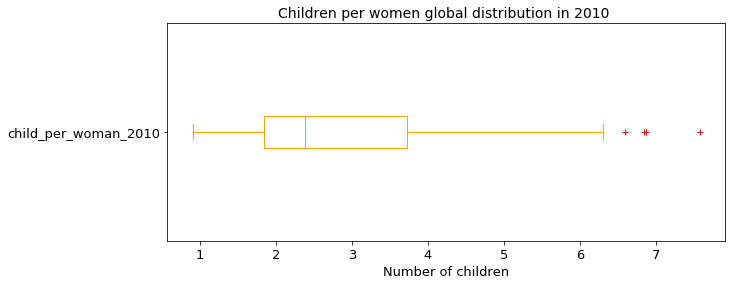

In [53]:
ax = child_per_woman.plot.box(color = 'orange', figsize=(10,4), fontsize=13, vert=False, sym='r+', );
ax.set_title('Children per women global distribution in 2010 ', fontsize=14)
ax.set_xlabel("Number of children", fontsize=13);

Then, let's obtain the median, the minimum and maximum values of child per woman rates.

In [54]:
child_per_woman_median = np.median(child_per_woman['child_per_woman_2010'])
child_per_woman_min = np.min(child_per_woman['child_per_woman_2010'])
child_per_woman_max = np.max(child_per_woman['child_per_woman_2010'])
child_per_woman_median

2.38

In [55]:
child_per_woman_min

0.9

In [56]:
child_per_woman_max

7.58

Around half of women in the world have between 1 and 2 children. The second half of women have up to 6. In very few countries women tend to have 7 children.  

<a id='q1'></a>
### Research Question 1: Do countries with higher fertility rates also have higher child mortality?

First, let's analize the child_mortality dataset with a boxplot.

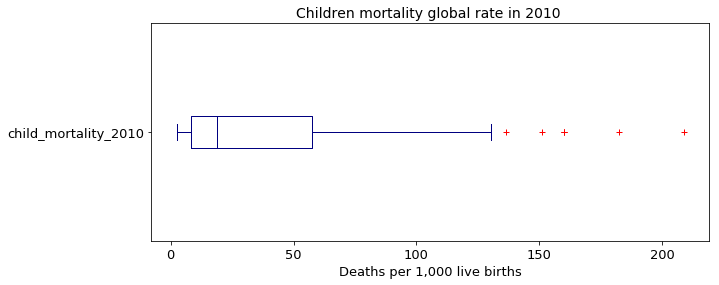

In [57]:
ax = child_mortality.plot.box(color = 'navy', figsize=(10,4), fontsize=13, vert=False, sym='r+');
ax.set_title('Children mortality global rate in 2010 ', fontsize=14)
ax.set_xlabel('Deaths per 1,000 live births', fontsize=13);

Then, let's obtain the median, the minimum and maximum values of child mortality rates.

In [58]:
child_mortality_median = np.median(child_mortality['child_mortality_2010'])
child_mortality_min = np.min(child_mortality['child_mortality_2010'])
child_mortality_max = np.max(child_mortality['child_mortality_2010'])
child_mortality_median

18.8

In [59]:
child_mortality_min

2.4

In [60]:
child_mortality_max

208.8

It shows that 50% of the countries have between 2.4 and 18.8 deaths per 1,000 live births.
The other 50% of the countries present between 18.8 and 208.8 deaths per 1,000 live births.

We're going to apply an inner join between the child_per_woman and child_mortality, and create another dataset called fert_vs_mort.

In [61]:
# Inner Join using the countries as the keys
fert_vs_mort = child_per_woman.merge(child_mortality, left_on='child_per_woman_country', 
                                     right_on='child_mortality_country', how='inner')

Then check the first data of the join. 

In [62]:
fert_vs_mort.head()

,child_per_woman_country,child_per_woman_2010,child_mortality_country,child_mortality_2010
0,Afghanistan,5.66,Afghanistan,105.0
1,Albania,1.74,Albania,16.6
2,Algeria,2.82,Algeria,27.4
3,Angola,6.22,Angola,182.5
4,Antigua and Barbuda,2.13,Antigua and Barbuda,9.9


According to the indicators files provided by Gapminder:

The definition of the ***Total fertility rate indicator*** is: the number of children that would be born to each woman with prevailing age-specific fertility rates.

The definition of the ***Child mortality indicator*** is: the probability that a child born in a specific year will die before reaching the age of five if subject to current age-specific mortality rates. Expressed as a rate per 1,000 live births.

Having the definitions, let's scatterplot the Babies per woman vs. the Child mortality, drawing a line in the Child per woman median, which is 2.38.

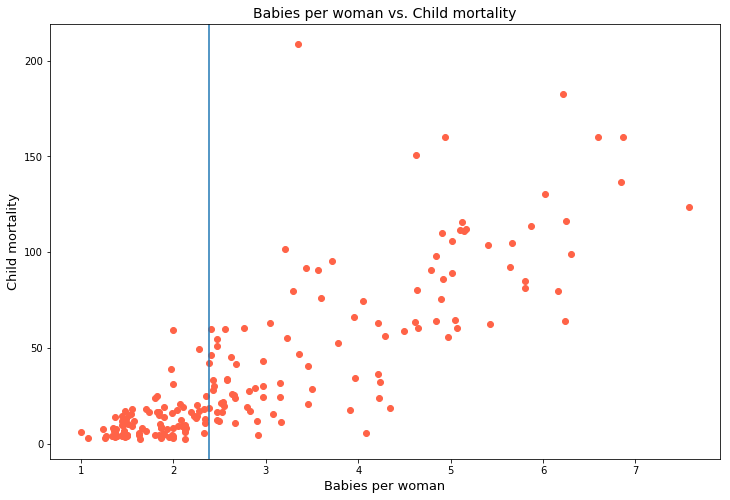

In [65]:
x=fert_vs_mort['child_per_woman_2010']
y=fert_vs_mort['child_mortality_2010']

fig_size = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x,y, c='tomato')

plt.axvline(2.38)

ax.set_xlabel('Babies per woman', fontsize=13)
ax.set_ylabel('Child mortality', fontsize=13)
ax.set_title('Babies per woman vs. Child mortality', fontsize=14)

plt.show();


This is a scatter plot which could be described as a positive, linear correlation.

50% of the countries with lower Babies per women, have not more than 60 deaths per 1,000 children, aproximately.

Some of the other 50% with higher Babies per women, present rates higher than 60 deaths per 1,000 children, aproximately.

Definitely there is a relation between more babies per women and a higher children mortality rate.

<a id='q2'></a>
### Research Question 2: Is the fertility related with the primary education completion?

In order to answer this question, we'll merge three datasets: 
- child_per_woman, which has the number of babies per woman by country
- primary_total, which has the completion rate of primary education by country
- primary_female, which has the completion rate in women of primary education by country

The inner merge was selected so no countries were left with no data.

In [66]:
fert_merge = child_per_woman.merge(primary_female, left_on='child_per_woman_country', 
                                     right_on='primary_female_country', how='inner')
fert_merge = fert_merge.merge(primary_total, left_on='child_per_woman_country', 
                                     right_on='primary_total_country', how='inner')


And check the merge was done correctly

In [67]:
fert_merge.head()

,child_per_woman_country,child_per_woman_2010,primary_female_country,primary_female_2010,primary_total_country,primary_total_2010
0,Albania,1.74,Albania,86.01452,Albania,86.26271
1,Algeria,2.82,Algeria,95.87439,Algeria,95.98508
2,Angola,6.22,Angola,40.03730,Angola,46.62628
3,Antigua and Barbuda,2.13,Antigua and Barbuda,98.27798,Antigua and Barbuda,100.36969
4,Aruba,1.70,Aruba,93.42784,Aruba,90.66496


Then sort by number of babies in ascending mode

In [68]:
sort2 = fert_merge.sort_values(['child_per_woman_2010'],  ascending=True)
sort2.head()

,child_per_woman_country,child_per_woman_2010,primary_female_country,primary_female_2010,primary_total_country,primary_total_2010
67,"Macao, China",1.00,"Macao, China",99.42411,"Macao, China",97.29573
13,Bosnia and Herzegovina,1.24,Bosnia and Herzegovina,70.68161,Bosnia and Herzegovina,69.61243
59,South Korea,1.27,South Korea,100.56875,South Korea,101.22695
102,Slovak Republic,1.35,Slovak Republic,99.07372,Slovak Republic,98.53745
72,Malta,1.37,Malta,97.01293,Malta,96.71453


According to the indicators files provided by Gapminder:

The definition of the ***Primary completion rate indicator*** is: the percentage of students completing the last year of primary school. It is calculated by taking the total number of students in the last grade of primary school, minus the number of repeaters in that grade, divided by the total number of children of official graduation age. 

Having the definitions in mind, in the same graph we'll plot a double bivariate graph

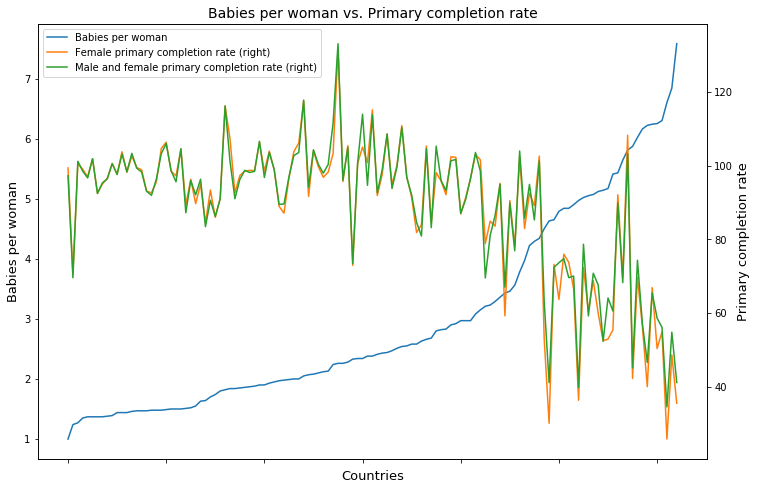

In [76]:
fig, ax = plt.subplots()
sort2.plot(x='child_per_woman_country', y='child_per_woman_2010', 
           figsize=[12,8], label='Babies per woman', ax=ax)
sort2.plot(secondary_y=True, x='child_per_woman_country', y='primary_female_2010', 
           label='Female primary completion rate', ax=ax)
sort2.plot(secondary_y=True, x='child_per_woman_country', y='primary_total_2010', 
           label='Male and female primary completion rate', ax=ax)
ax.set_ylabel('Babies per woman', fontsize=13)
ax.set_xlabel('Countries', fontsize=13)
ax.right_ax.set_ylabel('Primary completion rate', fontsize=13)
ax.set_title('Babies per woman vs. Primary completion rate', fontsize=14)

plt.show();

The blue line plot shows the ascending order of the countries by number of babies per woman.
The orange plot could be described as a negative, weak, non-linear correlation, in which as babies increase, the Primary female completion rate decreases.
The green plot is almost equal to the orange one. In this, while babies increase, the Primary completion rate decreases.

Since the orange and green plots differ almost nothing, we could suspect that there is no causation between having babies and completing the primary education.

<a id='q3'></a>
### Research Question 3: In poorer countries, do people tend to have a lot or few children?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


First, we'll analize with an histogram the income per person in the world

Text(0.5,1,'Global income per person distribution in 2010 ')

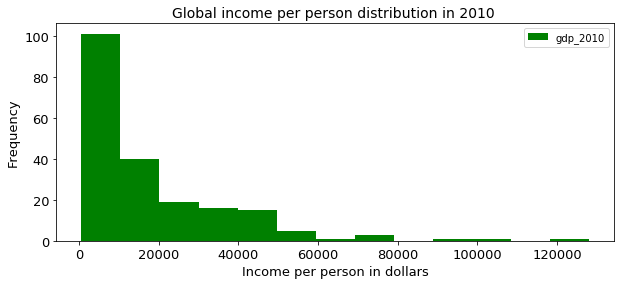

In [79]:
ax = gdp.plot.hist(color = 'green', figsize=(10,4), fontsize=13, bins=13);
ax.set_xlabel('Income per person in dollars', fontsize=13);
ax.set_ylabel('Frequency', fontsize=13);
ax.set_title('Global income per person distribution in 2010 ', fontsize=14)

We obtain the number of countries with a $10,000 dollars income (the peak in the histogram)

In [80]:
x =   gdp.query('gdp_2010 < 10000 ')
x.count()

gdp_country    98
gdp_2010       98
dtype: int64

In [81]:
gdp.gdp_2010.count()

203

This histogram is a unimodal, right skewed figure.

It shows that 98 out of 203 countries analized live with $10,000 dollars per capita per year, almost half of them.

Next, we perform a merge between the gdp and the fertility datasets.

In [82]:
gdp_vs_fert = gdp.merge(child_per_woman, left_on='gdp_country', 
                                     right_on='child_per_woman_country', how='inner')

In [83]:
gdp_vs_fert.head()

,gdp_country,gdp_2010,child_per_woman_country,child_per_woman_2010
0,Afghanistan,1637.0,Afghanistan,5.66
1,Albania,9374.0,Albania,1.74
2,Algeria,12494.0,Algeria,2.82
3,Angola,7047.0,Angola,6.22
4,Antigua and Barbuda,20567.0,Antigua and Barbuda,2.13


Then sort by gdp in ascending mode.

In [84]:
sort3 = gdp_vs_fert.sort_values(['gdp_2010'],  ascending=True)
sort3.head()

,gdp_country,gdp_2010,child_per_woman_country,child_per_woman_2010
154,Somalia,614.0,Somalia,6.87
38,"Congo, Dem. Rep.",632.0,"Congo, Dem. Rep.",6.25
97,Liberia,689.0,Liberia,5.02
27,Burundi,725.0,Burundi,6.30
104,Malawi,737.0,Malawi,5.64


According to the indicators files provided by Gapminder:

The definition of the ***GDP or Income per person indicator*** is: the Gross Domestic Product per capita by Purchasing Power Parities (in international dollars, fixed 2011 prices). The inflation and differences in the cost of living between countries has been taken into account.

Having this definition in mind, let's plot the Income per person vs. Babies per woman

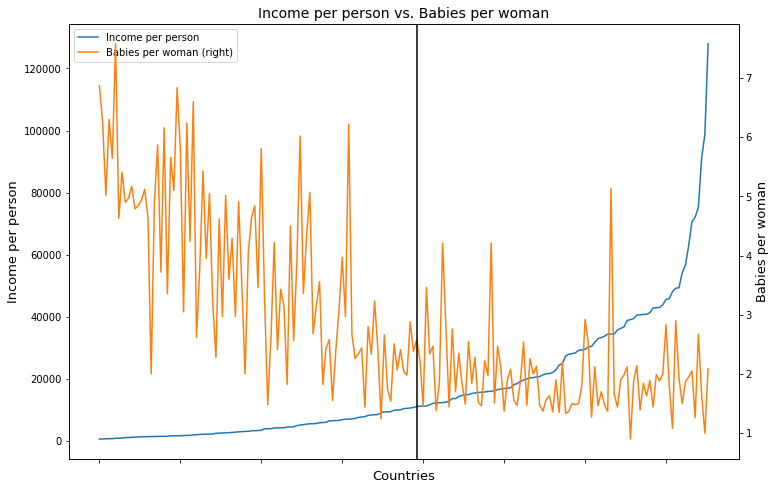

In [86]:
fig, ax = plt.subplots()
sort3.plot(x='gdp_country', y='gdp_2010', 
           figsize=[12,8], label='Income per person', ax=ax)
sort3.plot(secondary_y=True, x='child_per_woman_country', y='child_per_woman_2010', 
           label='Babies per woman', ax=ax)

plt.axvline(98, color='black')
ax.set_ylabel('Income per person', fontsize=13)
ax.set_xlabel('Countries', fontsize=13)
ax.right_ax.set_ylabel('Babies per woman', fontsize=13)
ax.set_title('Income per person vs. Babies per woman', fontsize=14)

plt.show();

The blue line plot shows the ascending order of the countries by number of babies per woman.

The orange plot could be described as a negative, very weak, non-linear correlation, in which as babies increase, the Income per person decreases.

The black line divides the 98 countries with a $10,000 dollars GDP. 

We could say that there is a poor inverse non-linear relation between Income per person and Babies per woman.

<a id='limconclusions'></a>
## Limitations

- One of the main limitations of the study were the large ocurrences of NAN cases. For example, the primary_female and primary_total dataframes had 143 and 145 NAN values respectively.


- Another big limitation is imbalanced data, where countries with low technological resources have less samples (as missing values) than richer ones, so the first ones are misrepresented.


- Maybe it would be helpful adding a column for the continent of each country. Creating such subgroups could offer another point of view.


- In the merge of some dataframes there were values that didn't match, and which were not represented in the merged plots.

All of these limitations can lead to biased analysis.

## Conclusions

In summary:

*** Do countries with higher fertility rates also have higher child mortality?***

There is a positive, linear relation between babies per woman and child mortality. This does not mean there is a causation.

*** Is the fertility related with the primary education completion? ***

It seems that countries with a higher rate of babies per woman, also have the lowest rates of primary completion. This does not mean there is a causation.
 
*** In poorer countries, do people tend to have a lot or few children?***

It seems that in poorer countries people tend to have more children than in richer countries. This does not mean there is a causation.

